# Stage C (Data Science Track) Code Submission

In [47]:
# Importing the base libraries.
import numpy as np
import pandas as pd

# Visualization libraries.
import matplotlib.pyplot as plt
import seaborn as sns

# Importing sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix

# Import XGBoost and Lightgbm Classifiers.
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [12]:
# Read in the dataset.
df = pd.read_csv('Data_for_UCI_named.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


### Preprocessing the Data

According to the [website](https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+#:~:text=1%20non%2Dpredictive(p1)), the *p1* feature is "non-predictive" hence it is dropped below.

As per instructions the *stab* column is also dropped.

In [13]:
# First extract the columns to be dropped into new dataframes.
p1 = df['p1']
stab = df['stab']

# Drop the columns.
df.drop(columns=['p1', 'stab'], inplace=True)

In [21]:
# Extract the feature and label columns.
features = df.drop(columns=['stabf'])
labels =df['stabf']

# Split the dataset.
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=1)

In [33]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Training the models

In [72]:
forest = RandomForestClassifier(random_state=1)
forest_model = forest.fit(X_train, y_train)

extra = ExtraTreesClassifier(random_state = 1)
extra_model = extra.fit(X_train, y_train)

xgb = XGBClassifier(random_state=1)
xgb_model = xgb.fit(X_train, y_train)

light = LGBMClassifier(random_state=1)
light_model = light.fit(X_train, y_train)

models = {'forest':forest_model, 
          'extra':extra_model, 
          'xgb':xgb_model, 
          'light':light_model}

TypeError: __init__() got an unexpected keyword argument 'cv'

### Get the predictions of the model

In [35]:
predictions = {}

for name, model in models.items():
    predictions[name] = model.predict(X_test)

### Evaluating the performance of the models

In [79]:
metrics = {'Accuracy': accuracy_score,
           'Precision': precision_score,
           'Recall': recall_score,
           'F1': f1_score}
scores = {}

y_test_binarized = np.where(y_test=='stable', 1, 0)

for name, metric in metrics.items():
    values = []
    for model, y_pred in predictions.items():
        y_pred_binarized = np.where(y_pred=='stable', 1, 0)
        values.append(metric(y_true=y_test_binarized, y_pred=y_pred_binarized))
    scores[name] = values
    
index = models.keys()
scores_df = pd.DataFrame(scores, index=index)

scores_df

0.123236062530079
0.04195464196852079
[(0.12207911884717687, 'tau1'), (0.123236062530079, 'tau2'), (0.11838117758225271, 'tau3'), (0.11925806818207288, 'tau4'), (0.04249135399950612, 'p2'), (0.043199867218495405, 'p3'), (0.04195464196852079, 'p4'), (0.09241991203766955, 'g1'), (0.09932569774143157, 'g2'), (0.09979063848493587, 'g3'), (0.09786346140785933, 'g4')]


### Confusion Matrix Visualizations

<AxesSubplot:title={'center':'LightGBM'}>

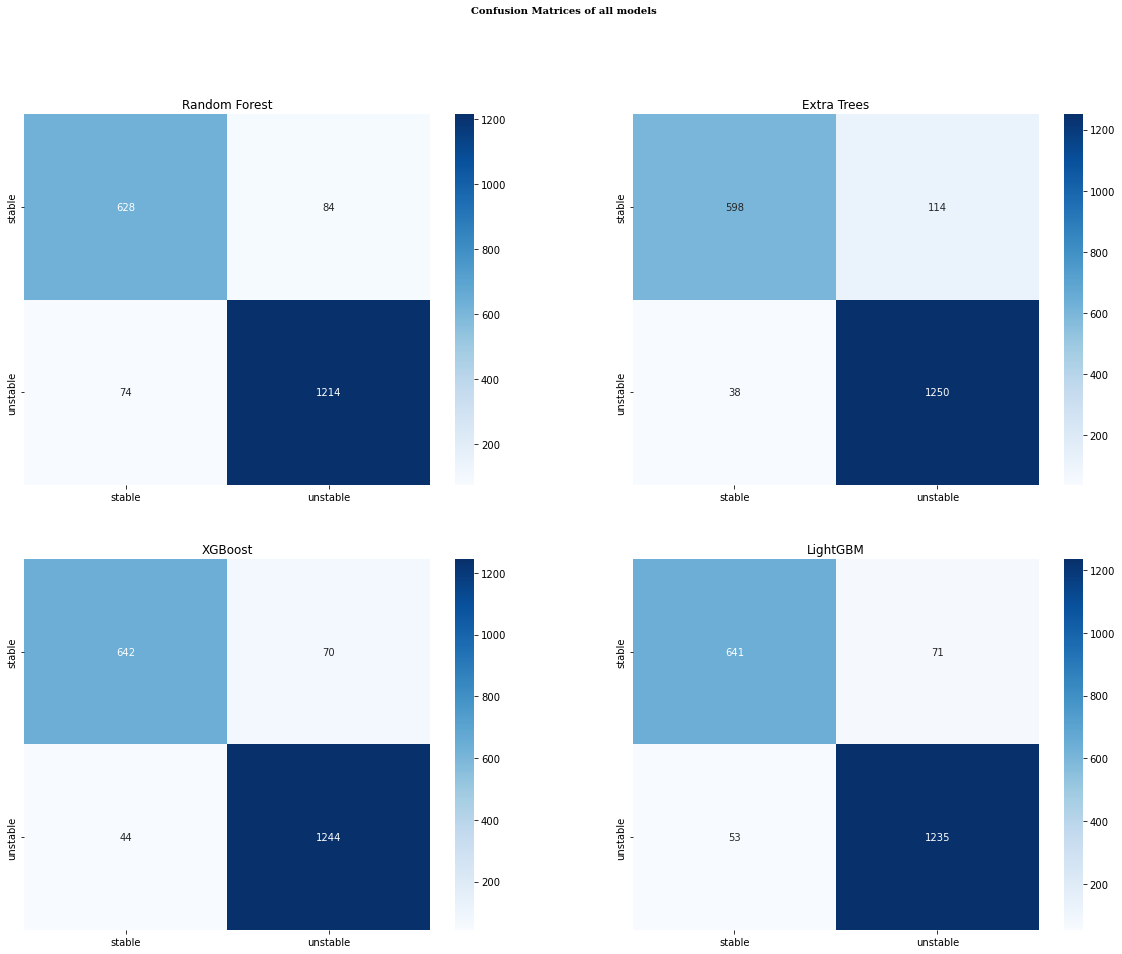

In [68]:
# Confusion Matrix of models

confusion_matrices = {}
for model, y_pred in predictions.items():
    confusion_matrices[model] = confusion_matrix(
        y_test, y_pred, labels=['stable', 'unstable'])
    
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle("Confusion Matrices of all models", size=30, font='Serif', weight='bold')


axes[0, 0].set_title("Random Forest")
sns.heatmap(
    confusion_matrices['forest'], annot=True,fmt='g', cmap="Blues", ax=axes[0, 0],
    xticklabels=['stable', 'unstable'], yticklabels=['stable', 'unstable']
)

axes[0, 1].set_title("Extra Trees")
sns.heatmap(
    confusion_matrices['extra'], annot=True,fmt='g', cmap="Blues", ax=axes[0, 1], 
    xticklabels=['stable', 'unstable'], yticklabels=['stable', 'unstable']
)

axes[1, 0].set_title("XGBoost")
sns.heatmap(
    confusion_matrices['xgb'], annot=True,fmt='g', cmap="Blues", ax=axes[1, 0],
    xticklabels=['stable', 'unstable'], yticklabels=['stable', 'unstable']
)

axes[1, 1].set_title("LightGBM")
sns.heatmap(
    confusion_matrices['light'], annot=True,fmt='g', cmap="Blues", ax=axes[1, 1],
    xticklabels=['stable', 'unstable'], yticklabels=['stable', 'unstable']
)

### Answers to other questions

###### Question 6

In [70]:
tp = 255
fp = 1380
fn = 45
f1 = tp/(tp + .5 * (fp + fn))
f1

0.26356589147286824

###### Question 8

In [85]:
from sklearn.model_selection import RandomizedSearchCV

# This code produces errors I don't know how to fix and i'm running low on time.
search = RandomizedSearchCV(
    ExtraTreesClassifier(), space, cv=5, n_iter=10, scoring = 'accuracy',
    n_jobs = -1, verbose = 1, random_state = 1
)

result = search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


ValueError: Invalid parameter solver for estimator ExtraTreesClassifier(). Check the list of available parameters with `estimator.get_params().keys()`.

###### Question 10

In [86]:
print(max(extra.feature_importances_))
print(min(extra.feature_importances_))

print(list(zip(extra.feature_importances_, features.columns)))

0.123236062530079
0.04195464196852079
[(0.12207911884717687, 'tau1'), (0.123236062530079, 'tau2'), (0.11838117758225271, 'tau3'), (0.11925806818207288, 'tau4'), (0.04249135399950612, 'p2'), (0.043199867218495405, 'p3'), (0.04195464196852079, 'p4'), (0.09241991203766955, 'g1'), (0.09932569774143157, 'g2'), (0.09979063848493587, 'g3'), (0.09786346140785933, 'g4')]


I must say... this has been the most difficult test yet.
I really had a **hard** time working on it.

Anyway, I believe in *spaced repitition* so if I don't fully understand it 
yet, I know this little *exercise* will help me to understand it better later.